In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv2 

In [2]:
x1 = np.array([
    [62,79,23,119,120,105,4,0],
    [10,10,9,62,12,78,34,0],
    [10,58,197,46,46,0,0,48],
    [176,135,5,188,191,68,0,49],
    [2,1,1,29,26,37,0,77],
    [0,89,144,147,187,102,62,208],
    [255,252,0,166,123,62,0,31],
    [166,63,127,17,1,0,99,30],
]).astype(np.uint8)
x2 = np.array([
    [9,7,1,1,1,2,2,1],
    [8,9,9,7,1,1,1,1],
    [7,8,9,7,1,2,1,1],
    [8,9,9,9,9,1,1,2],
    [8,9,9,7,7,2,1,3],
    [9,9,9,9,8,2,2,1],
    [9,9,8,8,7,1,2,1],
    [8,9,8,6,5,1,1,3],
    
]).astype(np.uint8)

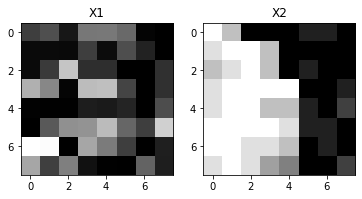

In [3]:
plt.subplot(121)
plt.imshow(x1,cmap='gray')
plt.title('X1')

plt.subplot(122)
plt.imshow(x2,cmap='gray')
plt.title('X2')

plt.show()

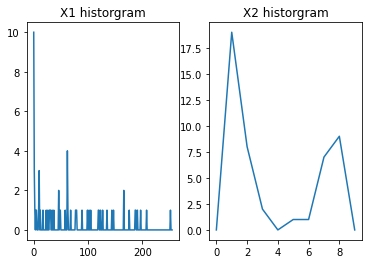

In [14]:
# Bài 1.1: Tính toán và hiển thị Historgram
hist1 = cv2.calcHist([x1], [0], None, [256], [0,255]) # hàm của OpenCV
hist2 = cv2.calcHist([x2], [0], None, [10], [0,9]) # hàm của OpenCV

plt.subplot(121)
plt.plot(hist1)
plt.title('X1 historgram')
plt.subplot(122)
plt.plot(hist2)
plt.title('X2 historgram')

plt.show()


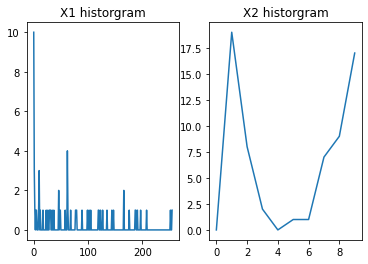

In [15]:
# Hàm tự viết 
hist1 = np.zeros(256)
for line in x1:
    for point in line:
        hist1[point] = hist1[point] + 1    

hist2 = np.zeros(10)
for line in x2:
    for point in line:
        hist2[point] = hist2[point] + 1 

plt.subplot(121)
plt.plot(hist1)
plt.title('X1 historgram')
plt.subplot(122)
plt.plot(hist2)
plt.title('X2 historgram')

plt.show()

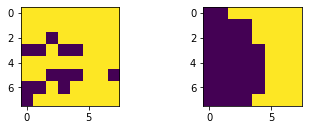

In [5]:
# Bài 1.2: Thực hiện nhị phân hoá
# ret,thresh1 = cv2.threshold(x1,127,1,cv2.THRESH_BINARY) # hàm có sẵn của OpenCV

threshold1 = 127
bin1 = np.zeros(x1.shape)
w, h = x1.shape
for i in range(w):
    for j in range(h):
        bin1[i][j] = 0 if x1[i][j] > threshold1 else 1

threshold2 = 5
bin2 = np.zeros(x1.shape)
w, h = x2.shape
for i in range(w):
    for j in range(h):
        bin2[i][j] = 0 if x2[i][j] > threshold2 else 1

plt.subplot(221)
plt.imshow(bin1)

plt.subplot(222)
plt.imshow(bin2)

plt.show()

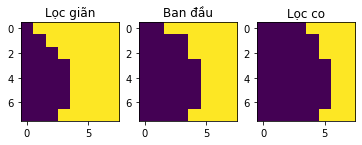

In [10]:
# Bài 1.3: Thưc hiên loc co và loc giãn với ảnh đã nhi phân hoá 
mask = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))
bin2_filter_max = cv2.morphologyEx(bin2, cv2.MORPH_DILATE, mask); # lọc giãn 
bin2_filter_min = cv2.morphologyEx(bin2, cv2.MORPH_ERODE, mask); # lọc co 

plt.subplot(131)
plt.imshow(bin2_filter_max)
plt.title('Lọc giãn')

plt.subplot(132)
plt.imshow(bin2)
plt.title('Ban đầu')

plt.subplot(133)
plt.imshow(bin2_filter_min)
plt.title('Lọc co')

plt.show()

In [17]:
# Bài tập 2: Cải thiện ảnh bằng hàm f1 và f2

# filter f1
def filter_f1(img, alpha=1, a=0):
    w, h = img.shape
    ret = np.zeros(img.shape,dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            if 0 <= img[i][j] and  img[i][j] < a:
                ret[i][j] = 0
            else:
                ret[i][j] = img[i][j] * alpha
    return ret

# filter f2
def filter_f2(img,a,b,beta,L):    
    w, h = img.shape
    ret = np.zeros(img.shape,dtype=np.uint8)
    for i in range(w):
        for j in range(h):
            if 0 <= img[i][j] and img[i][j] < a:
                ret[i][j] = 0
            elif a <= img[i][j] and img[i][j] < b:
                ret[i][j] = beta*(img[i][j] - a)
            elif b <= img[i][j] and img[i][j] < L:
                ret[i][j] = beta*(b - a)
    return ret

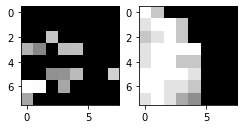

In [18]:
# Thực hiện cải thiện bằng hàm f1
x1_f1 = filter_f1(x1,alpha=0.5,a=128)
x2_f1 = filter_f1(x2,alpha=3,a=5)

plt.subplot(132)
plt.imshow(x1_f1,cmap='gray')

plt.subplot(133)
plt.imshow(x2_f1,cmap='gray')

plt.show()

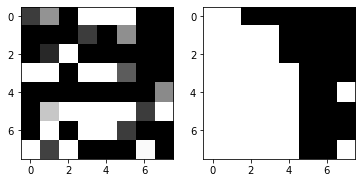

In [19]:
# Thực hiện cải thiện bằng hàm f2
x1_f2 = filter_f2(x1,a=50,b=100,beta=3,L=255)
x2_f2 = filter_f2(x2,a=2,b=3,beta=3,L=10)

plt.subplot(121)
plt.imshow(x1_f2,cmap='gray')

plt.subplot(122)
plt.imshow(x2_f2,cmap='gray')

plt.show()

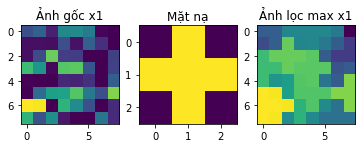

Trước khi lọc max: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
Mặt nạ: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
Sau khi lọc max: 
 [[ 79  79 119 120 120 120 105   4]
 [ 62  79 197 119 120 105  78  48]
 [176 197 197 197 191  78  48  49]
 [176 176 197 191 191 191  68  77]
 [176 135 144 188 191 102  77 208]
 [255 252 147 187 187 187 208 208]
 [255 255 252 166 187 123  99 208]
 [255 252 127 166 123  99  99  99]]


In [9]:
# Bài 3: Thực hiện phép lọc max trên hai ảnh (cũ)

# Mặt nạ hình chữ thập 
mask = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc max (lọc giãn, lọc dilation)
x1_filter_max = cv2.morphologyEx(x1, cv2.MORPH_DILATE, mask);

plt.subplot(131),plt.imshow(x1),plt.title('Ảnh gốc x1')
plt.subplot(132),plt.imshow(mask),plt.title('Mặt nạ')
plt.subplot(133),plt.imshow(x1_filter_max),plt.title('Ảnh lọc max x1')

plt.show()

print('Trước khi lọc max: \n',x1)
print('Mặt nạ: \n',mask)
print('Sau khi lọc max: \n',x1_filter_max)

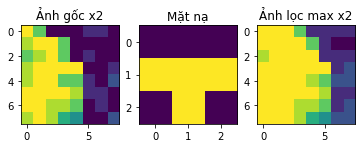

Trước khi lọc max: 
 [[9 7 1 1 1 2 2 1]
 [8 9 9 7 1 1 1 1]
 [7 8 9 7 1 2 1 1]
 [8 9 9 9 9 1 1 2]
 [8 9 9 7 7 2 1 3]
 [9 9 9 9 8 2 2 1]
 [9 9 8 8 7 1 2 1]
 [8 9 8 6 5 1 1 3]]
Mặt nạ: 
 [[0 0 0]
 [1 1 1]
 [0 1 0]]
Sau khi lọc max: 
 [[9 9 9 7 2 2 2 2]
 [9 9 9 9 7 2 1 1]
 [8 9 9 9 9 2 2 2]
 [9 9 9 9 9 9 2 3]
 [9 9 9 9 8 7 3 3]
 [9 9 9 9 9 8 2 2]
 [9 9 9 8 8 7 2 3]
 [9 9 9 8 6 5 3 3]]


In [10]:
# Mặt nạ 
mask2 = np.array([[0,0,0],[1,1,1],[0,1,0]]).astype(np.uint8)

# phép lọc max (lọc giãn, lọc dilation)
x2_filter_max = cv2.morphologyEx(x2, cv2.MORPH_DILATE, mask2);

plt.subplot(131),plt.imshow(x2),plt.title('Ảnh gốc x2')
plt.subplot(132),plt.imshow(mask2),plt.title('Mặt nạ')
plt.subplot(133),plt.imshow(x2_filter_max),plt.title('Ảnh lọc max x2')

plt.show()

print('Trước khi lọc max: \n',x2)
print('Mặt nạ: \n',mask2)
print('Sau khi lọc max: \n',x2_filter_max)

In [11]:
# Bài 4: Cho ma trận x2 
x2 = np.array([
    [9,7,1,1,1,2,2,1],
    [8,9,9,7,1,1,1,1],
    [7,8,9,7,1,2,1,1],
    [8,9,9,9,9,1,1,2],
    [8,9,9,7,7,2,1,3],
    [9,9,9,9,8,2,2,1],
    [9,9,8,8,7,1,2,1],
    [8,9,8,6,5,1,1,3],
    
]).astype(np.uint8)


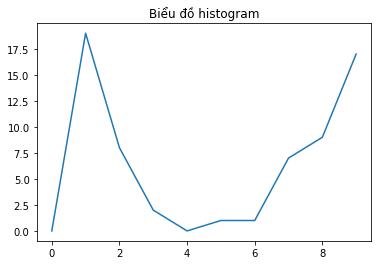

In [12]:
# 1. Thực hiện tính và vẽ historgram, nhận xét về độ tương phản của ảnh
hist = cv2.calcHist([x2], [0], None, [10], [0,10]) 
plt.plot(hist)
plt.title('Biểu đồ histogram')
plt.show()

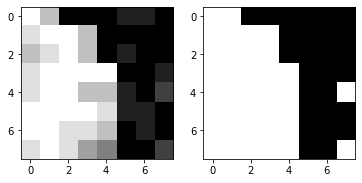

In [13]:
# 2. Thực hiện thay đổi độ tương phản theo filter f2
x2_f2 = filter_f2(x2,a=2,b=3,beta=3,L=10)
plt.subplot(121)
plt.imshow(x2,cmap='gray')
plt.subplot(122)
plt.imshow(x2_f2,cmap='gray')
plt.show()

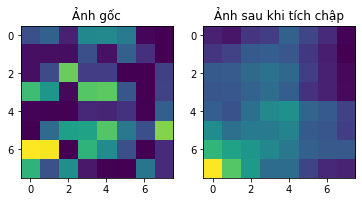

Trước khi tích chập: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
Sau khi tích chập: 
 [[ 31  25  43  48  72  53  37  16]
 [ 42  51  67  70  65  44  30  14]
 [ 67  68  79  84  77  48  31  18]
 [ 64  65  73  81  70  41  31  19]
 [ 70  61  82 102 108  75  67  51]
 [105  83  92  91  98  67  64  49]
 [137 122 112 101  89  71  66  66]
 [201 152 116  80  80  52  35  32]]


In [14]:
# Bài 3.1: Bộ lọc thông thấp (bộ lọc trung bình)
# Kernel tích chập (bộ lọc trung bình)
kernel = np.ones((3,3),np.float32)/9

# Tích chập 2 ma trận
x1_conv = cv2.filter2D(x1,-1,kernel)

plt.subplot(121),plt.imshow(x1),plt.title('Ảnh gốc')
plt.subplot(122),plt.imshow(x1_conv),plt.title('Ảnh sau khi tích chập')
plt.show()

print('Trước khi tích chập: \n',x1)
print('Sau khi tích chập: \n',x1_conv)

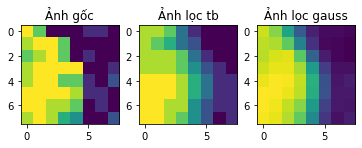

In [15]:
# Kernel tích chập (bộ lọc gaussian)
kernel_mean = np.ones((3,3),np.float32)/9
kernel_gauss = np.array([[1,2,1],[2,4,2],[1,2,2]])

# Tích chập 2 ma trận
x2_conv1 = cv2.filter2D(x2,-1,kernel_mean)
x2_conv2 = cv2.filter2D(x2,-1,kernel_gauss)

plt.subplot(131),plt.imshow(x2),plt.title('Ảnh gốc')
plt.subplot(132),plt.imshow(x2_conv1),plt.title('Ảnh lọc tb')
plt.subplot(133),plt.imshow(x2_conv2),plt.title('Ảnh lọc gauss')
plt.show()


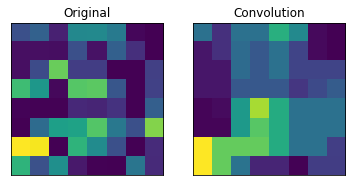

before median filter: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
after median filter: 
 [[ 62  23  62  62 105  78   4   0]
 [ 10  23  58  46  62  34   4   0]
 [ 10  10  58  46  62  34  34  34]
 [ 10  10  46  46  46  26  37  48]
 [  2   5  89 144 102  62  62  62]
 [  2   2  89 123 102  62  62  62]
 [166 127 127 127 102  62  62  31]
 [166 127  63  17  17   1  30  30]]


In [16]:
x1_median_blue = cv2.medianBlur(x1,3)

plt.subplot(121),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(x1_median_blue),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()
print('before median filter: \n',x1)
print('after median filter: \n',x1_median_blue)

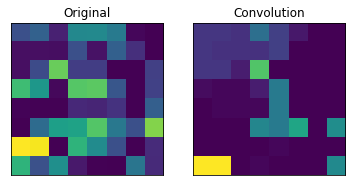

before median filter: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
kernel: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
after median filter: 
 [[10 10  9 23 12  4  0  0]
 [10  9  9  9 12  0  0  0]
 [10 10  5 46  0  0  0  0]
 [ 2  1  1  5 26  0  0  0]
 [ 0  1  1  1 26  0  0  0]
 [ 0  0  0 29 26 37  0 31]
 [ 0  0  0  0  1  0  0  0]
 [63 63  0  1  0  0  0 30]]


In [17]:
#     cv::Mat kernel = cv::getStructuringElement(MORPH_CROSS, Size(5,5));
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc min ( lọc co, lọc erosion )
output = cv2.morphologyEx(x1, cv2.MORPH_ERODE, kernel);

plt.subplot(121),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(output),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()
print('before median filter: \n',x1)
print('kernel: \n',kernel)
print('after median filter: \n',output)

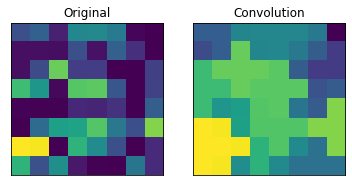

before median filter: 
 [[ 62  79  23 119 120 105   4   0]
 [ 10  10   9  62  12  78  34   0]
 [ 10  58 197  46  46   0   0  48]
 [176 135   5 188 191  68   0  49]
 [  2   1   1  29  26  37   0  77]
 [  0  89 144 147 187 102  62 208]
 [255 252   0 166 123  62   0  31]
 [166  63 127  17   1   0  99  30]]
kernel: 
 [[0 1 0]
 [1 1 1]
 [0 1 0]]
after median filter: 
 [[ 79  79 119 120 120 120 105   4]
 [ 62  79 197 119 120 105  78  48]
 [176 197 197 197 191  78  48  49]
 [176 176 197 191 191 191  68  77]
 [176 135 144 188 191 102  77 208]
 [255 252 147 187 187 187 208 208]
 [255 255 252 166 187 123  99 208]
 [255 252 127 166 123  99  99  99]]


In [18]:
# kernel hình chữ thập 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc max (lọc giãn, lọc dilation)
output = cv2.morphologyEx(x1, cv2.MORPH_DILATE, kernel);

plt.subplot(121),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(122),plt.imshow(output),plt.title('Convolution')
plt.xticks([]), plt.yticks([])
plt.show()
print('before median filter: \n',x1)
print('kernel: \n',kernel)
print('after median filter: \n',output)

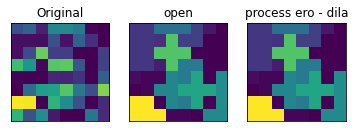

In [20]:
# kernel hình chữ thập 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc mở (open, lọc co -> dãn )
output = cv2.morphologyEx(x1, cv2.MORPH_OPEN, kernel);

ero = cv2.morphologyEx(x1, cv2.MORPH_ERODE, kernel);
dila = cv2.morphologyEx(ero, cv2.MORPH_DILATE, kernel);

plt.subplot(131),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(output),plt.title('open')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(dila),plt.title('process ero - dila')
plt.xticks([]), plt.yticks([])

plt.show()

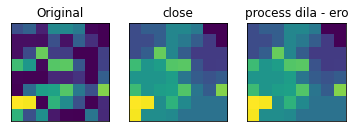

In [22]:
# kernel hình chữ thập 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc đóng (close, lọc giãn -> co )
output = cv2.morphologyEx(x1, cv2.MORPH_CLOSE, kernel);

dila = cv2.morphologyEx(x1, cv2.MORPH_DILATE, kernel);
ero = cv2.morphologyEx(dila, cv2.MORPH_ERODE, kernel);

plt.subplot(131),plt.imshow(x1),plt.title('Original')
plt.xticks([]), plt.yticks([])

plt.subplot(132),plt.imshow(output),plt.title('close')
plt.xticks([]), plt.yticks([])

plt.subplot(133),plt.imshow(ero),plt.title('process dila - ero')
plt.xticks([]), plt.yticks([])

plt.show()

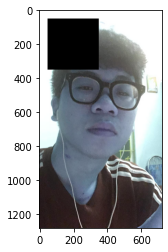

In [11]:
# Bài 7.1
# Xoá một đối tượng khỏi ảnh 
img_delete = cv2.imread("data/hieu.jpg")

x_offset = 50
y_offset = 50

width = 300 
height = 300

img_delete[y_offset:y_offset+width, x_offset:x_offset+height] = 0
plt.imshow(img_delete)
plt.show()

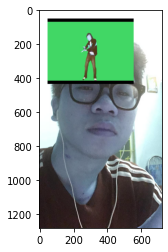

In [12]:
# Bài 7.2
# Thêm 1 ảnh vào 1 ảnh 
img_insert = cv2.imread("data/hieu.jpg")
img_small = cv2.imread("data/banh.jpg")

x_offset = 50
y_offset = 50

width, height, _ = img_small.shape

img_insert[y_offset:y_offset+width, x_offset:x_offset+height] = img_small
plt.imshow(img_insert)
plt.show()

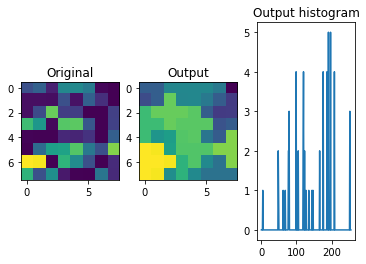

In [28]:
# Bài 3.2 Thực hiện lọc max và nhận xét kết quả đa mức xám

# kernel hình chữ thập 
kernel = cv2.getStructuringElement(cv2.MORPH_CROSS,(3,3))

# phép lọc max (lọc giãn, lọc dilation)
output_max = cv2.morphologyEx(x1, cv2.MORPH_DILATE, kernel);

hist_output_max = cv2.calcHist([output_max], [0], None, [256], [0,255]) # hàm của OpenCV

plt.subplot(131),plt.imshow(x1),plt.title('Original')

plt.subplot(132),plt.imshow(output_max),plt.title('Output')


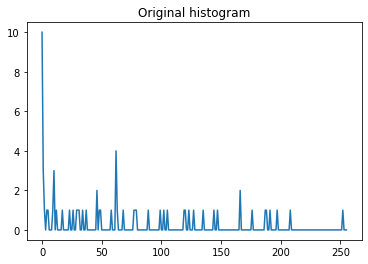

In [33]:
hist_x1 = cv2.calcHist([x1], [0], None, [256], [0,255]) # hàm của OpenCV
plt.plot(hist_x1)
plt.title('Original histogram')
plt.show()

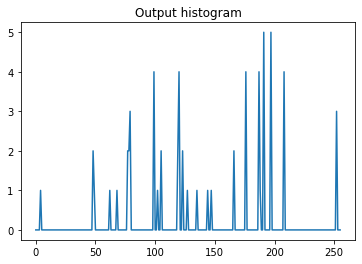

In [32]:
plt.plot(hist_output_max)
plt.title('Output histogram')
plt.show()

In [ ]:
# Bài 3.3
